In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype in ['int64','float64']
                    and feature not in ['Year']]
numerical_feature

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [4]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O' 
                      and feature not in ['Car_Name'] ]
categorical_feature

['Fuel_Type', 'Seller_Type', 'Transmission']

<AxesSubplot:>

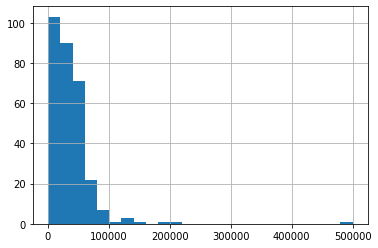

In [5]:
data['Kms_Driven'].hist(bins=25)

In [6]:
# converting the numerical feature into normal Distribution
# it is impactfull on predicting the result
for feature in numerical_feature:
    data[feature] = np.log1p(data[feature])

<AxesSubplot:xlabel='Kms_Driven'>

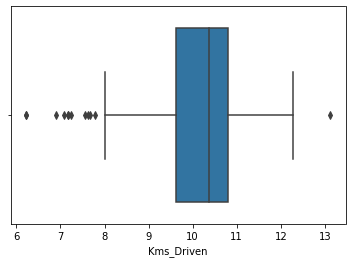

In [7]:
# fixing the outlier
sns.boxplot(data['Kms_Driven'])

<AxesSubplot:>

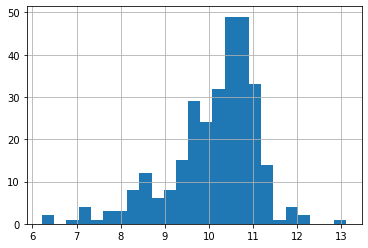

In [8]:
data['Kms_Driven'].hist(bins=25)

In [9]:
mean = np.mean(data['Kms_Driven'])
std = np.std(data['Kms_Driven'])

lower = mean - 3*std
upper = mean + 3*std

Kms_Driven_outlier = [value for value in data['Kms_Driven'] if value < lower or value > upper]
Kms_Driven_outlier_Rem = [value for value in data['Kms_Driven'] if value >= lower and value <= upper ]

for i in range(len(Kms_Driven_outlier)):
        Kms_Driven_outlier_Rem.append(np.median(Kms_Driven_outlier_Rem)) 
        
data['Kms_Driven'] = Kms_Driven_outlier_Rem

<AxesSubplot:xlabel='Kms_Driven'>

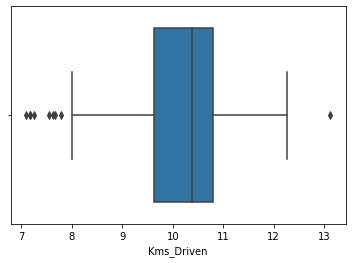

In [10]:
sns.boxplot(data['Kms_Driven'])

<AxesSubplot:>

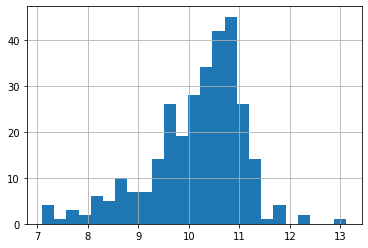

In [11]:
data['Kms_Driven'].hist(bins=25)

In [12]:
len(data.Car_Name.unique())

98

In [13]:
#encoding the car name
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Car_Name'] = pd.DataFrame(encoder.fit_transform(data['Car_Name']))

<AxesSubplot:>

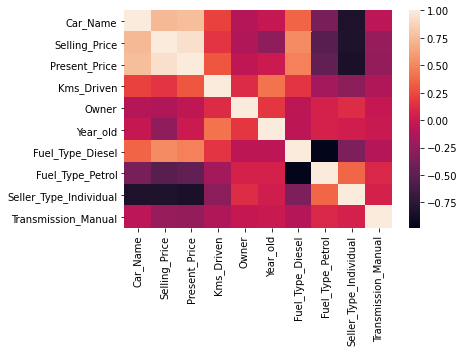

In [31]:
sns.heatmap(data.corr())

In [15]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,1.470176,1.885553,10.203629,Petrol,Dealer,Manual,0.0
1,93,2013,1.749200,2.355178,10.668979,Diesel,Dealer,Manual,0.0
2,68,2017,2.110213,2.384165,8.839422,Petrol,Dealer,Manual,0.0
3,96,2011,1.348073,1.638997,8.556606,Petrol,Dealer,Manual,0.0
4,92,2014,1.722767,2.063058,10.656106,Diesel,Dealer,Manual,0.0


In [16]:
# modifying the year feature to which much time passed
data['Current_year'] = 2021
data['Year_old'] = data['Current_year'] - data['Year']
data = data.drop(['Year','Current_year'],axis=1)

In [17]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_old
0,90,1.470176,1.885553,10.203629,Petrol,Dealer,Manual,0.0,7
1,93,1.749200,2.355178,10.668979,Diesel,Dealer,Manual,0.0,8
2,68,2.110213,2.384165,8.839422,Petrol,Dealer,Manual,0.0,4
3,96,1.348073,1.638997,8.556606,Petrol,Dealer,Manual,0.0,10
4,92,1.722767,2.063058,10.656106,Diesel,Dealer,Manual,0.0,7


In [18]:
print(data.Fuel_Type.unique())
print(data.Seller_Type.unique())
print(data.Transmission.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [19]:
# converting to the numerical feature one hot encoding
for feature in categorical_feature:
    df_dummies = pd.get_dummies(data[feature],drop_first=True,prefix=feature)
    data = pd.concat([data,df_dummies],axis=1)
    data = data.drop([feature],axis=1)

In [20]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,90,1.470176,1.885553,10.203629,0.0,7,0,1,0,1
1,93,1.749200,2.355178,10.668979,0.0,8,1,0,0,1
2,68,2.110213,2.384165,8.839422,0.0,4,0,1,0,1
3,96,1.348073,1.638997,8.556606,0.0,10,0,1,0,1
4,92,1.722767,2.063058,10.656106,0.0,7,1,0,0,1


In [21]:
# indepenent and dependent features
X = data.drop(['Selling_Price'],axis=1)
y = data['Selling_Price']

In [22]:
'''
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X) ,columns=X.columns)
'''
# feature scaling is not impacting that much 

'\nfrom sklearn.preprocessing import StandardScaler\nscalar = StandardScaler()\nX = pd.DataFrame(scalar.fit_transform(X) ,columns=X.columns)\n'

In [23]:
X.head()

,Car_Name,Present_Price,Kms_Driven,Owner,Year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,90,1.885553,10.203629,0.0,7,0,1,0,1
1,93,2.355178,10.668979,0.0,8,1,0,0,1
2,68,2.384165,8.839422,0.0,4,0,1,0,1
3,96,1.638997,8.556606,0.0,10,0,1,0,1
4,92,2.063058,10.656106,0.0,7,1,0,0,1


In [24]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
# now feature selection using ENsemble training
from sklearn.metrics import r2_score
def model_predict(model):
    model = model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"nR2 Score Test: {r2_score(y_pred,y_test)}")

In [54]:
from sklearn.ensemble import RandomForestRegressor
model_predict(RandomForestRegressor())

nR2 Score Test: 0.9755314563078107


In [55]:
from xgboost import XGBRegressor
model_predict(XGBRegressor())

nR2 Score Test: 0.9740406833967008


In [56]:
from sklearn.svm import SVR
model_predict(SVR(kernel='rbf'))

nR2 Score Test: 0.6150950177042591


In [57]:
from sklearn.tree import DecisionTreeRegressor
model_predict(DecisionTreeRegressor())

nR2 Score Test: 0.9552086005929321


In [58]:
from sklearn.linear_model import Ridge,LinearRegression,Lasso
model_predict(Ridge())
model_predict(Lasso())
model_predict(LinearRegression())

nR2 Score Test: 0.9667298969575624
nR2 Score Test: 0.09467122525262595
nR2 Score Test: 0.9662321387898408
